<h1>Chicago Crimes</h1>
<hr>
<h3>Inciong, Avian Cayle</h3>
<h3>BSIT 3A</h3>


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
crimes = pd.read_csv('datasets\\Chicago_crimes.csv')

In [5]:
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [15]:
for i in crimes.select_dtypes(include='object').columns:
    crimes[i] = crimes[i].astype('category')

In [16]:
crimes.dtypes

ID                         int64
Case Number             category
Date                    category
Block                   category
IUCR                    category
Primary Type            category
Description             category
Location Description    category
Arrest                      bool
Domestic                    bool
Beat                       int64
District                   int64
Ward                       int64
Community Area           float64
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int32
Updated On              category
Latitude                 float64
Longitude                float64
Location                category
Month                      int32
Day                        int32
DayOfWeek                  int32
dtype: object

In [17]:
crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst = True, errors = 'coerce')

In [18]:
crimes ['Year'] = crimes['Date'].dt.year
crimes ['Month'] = crimes['Date'].dt.month
crimes ['Day'] = crimes['Date'].dt.day
crimes['DayOfWeek'] = crimes['Date'].dt.dayofweek

<hr>

<h1>What year has the highest crime recorded?</h1>

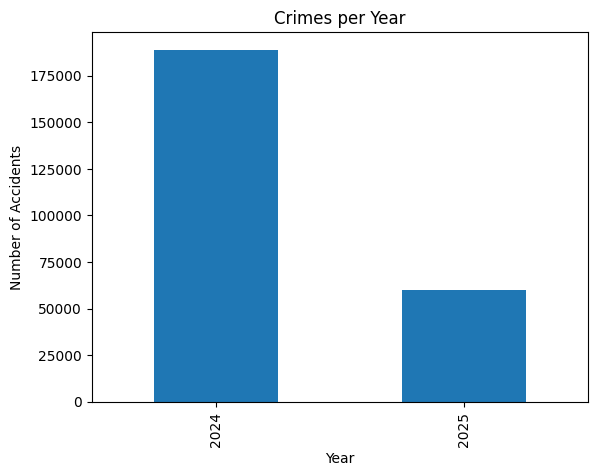

Year
2024    188918
2025     60205
Name: count, dtype: int64


In [49]:
arrest_per_year =crimes['Year'].value_counts().sort_index()

Year = {
    2024: '2024', 2025: '2025',
}

arrest_per_year.index = arrest_per_year.index.map(Year)


arrest_per_year.plot(kind='bar')
plt.title('Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()
print(arrest_per_year)

<h2>INSIGHT #1</h2>
<h2>2024 holds the record with 188,918 crimes in Chicago </h2>

<hr>

<h1>Most recorded crime in chicago</h1>

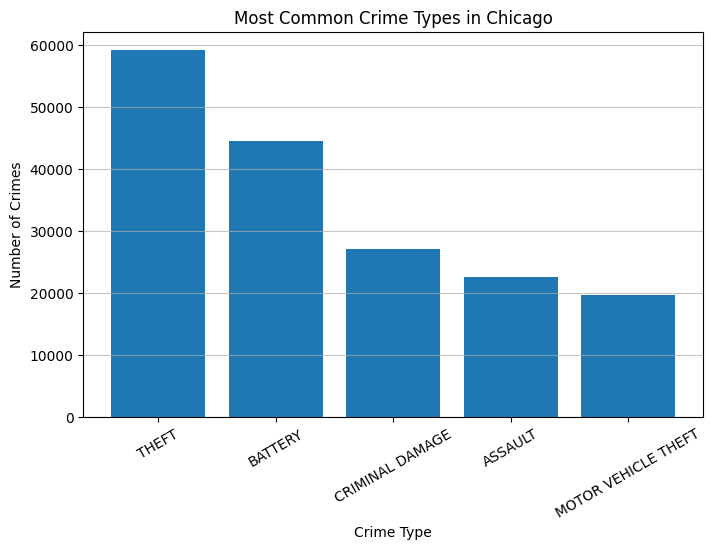

In [56]:
most_common_crime = crimes['Primary Type'].value_counts().idxmin()
crime_counts = crimes['Primary Type'].value_counts()

most_common = crime_counts.head(5)

plt.figure(figsize=(8,5))
plt.bar(most_common.index, most_common.values)
plt.title("Most Common Crime Types in Chicago")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.7)
plt.show()

<h2>INSIGHT #2</h2>
<h2>Theft holds the most recorded crime in chicago with a record of 60,000 </h2>

<hr>

<h1>Least recorded crime in chicago</h1>

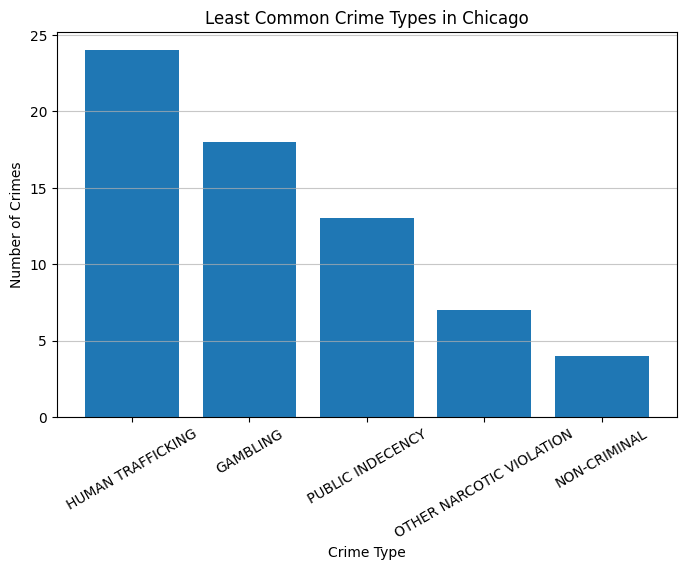

In [55]:
least_common_crime = crimes['Primary Type'].value_counts().idxmin()
crime_counts = crimes['Primary Type'].value_counts()

least_common = crime_counts.tail(5)

plt.figure(figsize=(8,5))
plt.bar(least_common.index, least_common.values)
plt.title("Least Common Crime Types in Chicago")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=30)
plt.grid(axis='y', alpha=0.7)
plt.show()

<h2>INSIGHT #3</h2>
<h2>Non-criminal is the least recorded with 4 records</h2>

<hr>

<h1>Percentage of arrested and not arrested crimes</h1>

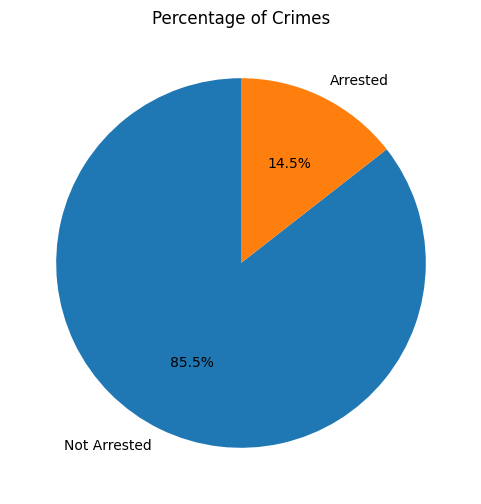

In [60]:
arrest_counts = crimes['Arrest'].value_counts()

arrest_percent = (arrest_counts / len(crimes)) * 100

plt.figure(figsize=(6,6))
plt.pie(arrest_percent, labels=['Not Arrested', 'Arrested'], autopct='%1.1f%%', startangle=90)
plt.title("Percentage of Crimes")
plt.show()

<h1> INSIGHT #4</h1>
<h2>Many crimes did not result in being arested with a percentage of 85.5% while arrested crimes only has 14.5%</h2>

<hr>